Survival analysis is a powerful statistical tool used to analyze time-to-event data, such as employee attrition. Performing survival analysis on an employee attrition dataset allows organizations to gain valuable insights into the patterns and factors influencing employee turnover. 
- Comparing different groups:
  - compare attrition rate across different demographic groups
  - evaluate how different factors impact employee retention
- Use models like cox regression to quantify the impact of various covariates on employee turnover.

In [2]:
import pandas as pd

file_path = 'employee_attrition.csv'
employee_data = pd.read_csv(file_path)

# Prepare data
employee_data['tenure'] = employee_data['YearsAtCompany']
employee_data['event'] = employee_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# dropping useless columns : 'EmployeeCount','Over18'
employee_data.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)

In [3]:
# Department , OverTime , BusinessTravel, JobLevel, MaritalStatus, StockOptionLevel
# Kaplan Meier Curve shows some value within category have high attrition.

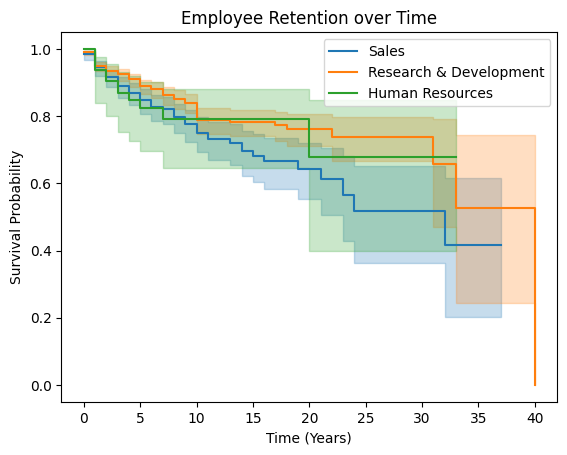

In [11]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
# kmf.fit(durations=employee_data['tenure'], event_observed=employee_data['event'])

for dept in employee_data['Department'].unique():
    kmf.fit(durations=employee_data[employee_data['Department'] == dept]['tenure'], 
            event_observed=employee_data[employee_data['Department'] == dept]['event'], 
            label=dept)
    kmf.plot_survival_function()

# Plot the survival function
# kmf.plot_survival_function()
plt.title('Employee Retention over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

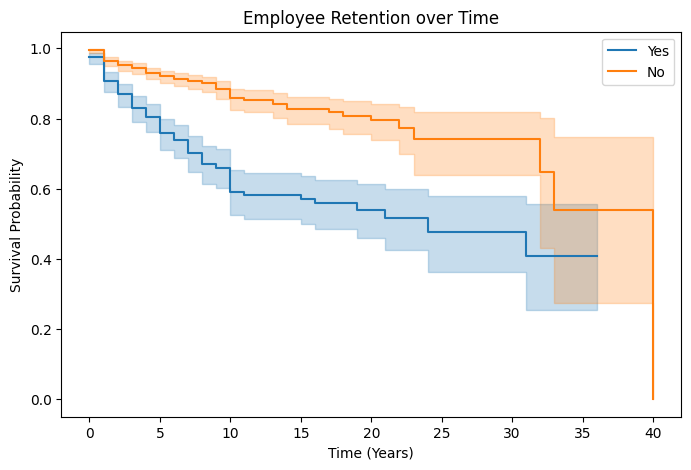

In [5]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
# kmf.fit(durations=employee_data['tenure'], event_observed=employee_data['event'])

plt.figure(figsize=(8, 5))

for dept in employee_data['OverTime'].unique():
    kmf.fit(durations=employee_data[employee_data['OverTime'] == dept]['tenure'], 
            event_observed=employee_data[employee_data['OverTime'] == dept]['event'], 
            label=dept)
    kmf.plot_survival_function()

# Plot the survival function
# kmf.plot_survival_function()
plt.title('Employee Retention over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

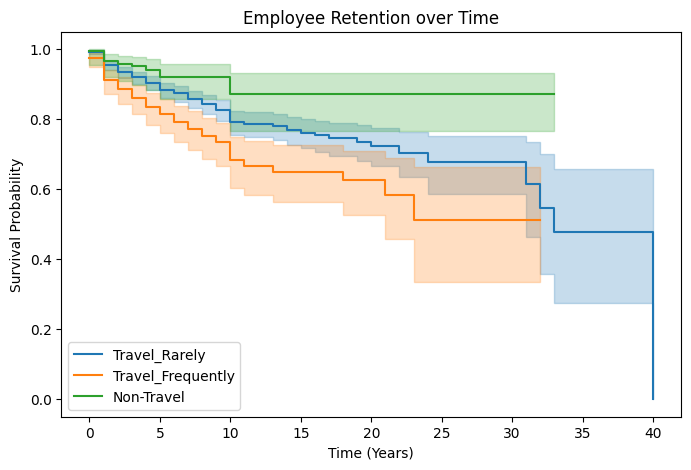

In [6]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
# kmf.fit(durations=employee_data['tenure'], event_observed=employee_data['event'])

plt.figure(figsize=(8, 5))

for dept in employee_data['BusinessTravel'].unique():
    kmf.fit(durations=employee_data[employee_data['BusinessTravel'] == dept]['tenure'], 
            event_observed=employee_data[employee_data['BusinessTravel'] == dept]['event'], 
            label=dept)
    kmf.plot_survival_function()

# Plot the survival function
# kmf.plot_survival_function()
plt.title('Employee Retention over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

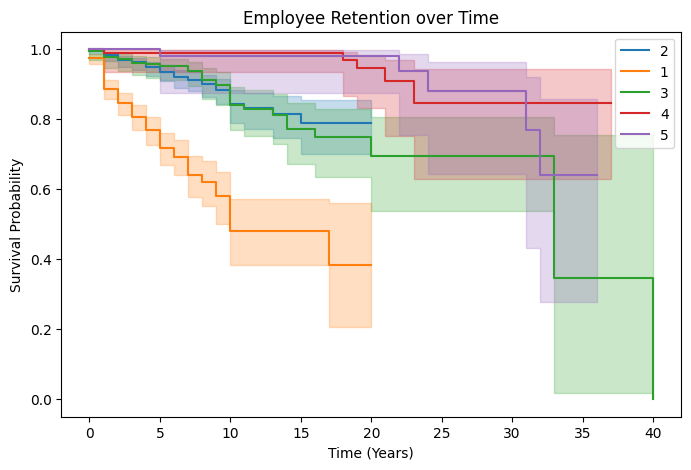

In [7]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
# kmf.fit(durations=employee_data['tenure'], event_observed=employee_data['event'])

plt.figure(figsize=(8, 5))

for dept in employee_data['JobLevel'].unique():
    kmf.fit(durations=employee_data[employee_data['JobLevel'] == dept]['tenure'], 
            event_observed=employee_data[employee_data['JobLevel'] == dept]['event'], 
            label=dept)
    kmf.plot_survival_function()

# Plot the survival function
# kmf.plot_survival_function()
plt.title('Employee Retention over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

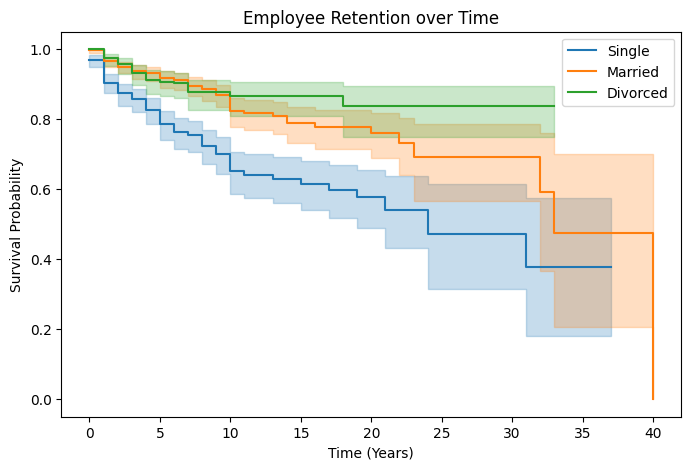

In [8]:
# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
# kmf.fit(durations=employee_data['tenure'], event_observed=employee_data['event'])

plt.figure(figsize=(8, 5))

for dept in employee_data['MaritalStatus'].unique():
    kmf.fit(durations=employee_data[employee_data['MaritalStatus'] == dept]['tenure'], 
            event_observed=employee_data[employee_data['MaritalStatus'] == dept]['event'], 
            label=dept)
    kmf.plot_survival_function()

# Plot the survival function
# kmf.plot_survival_function()
plt.title('Employee Retention over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1218.28
         time fit was run = 2024-08-01 06:21:46 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
Age                              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
MonthlyIncome                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
YearsInCurrentRole               -0.32      0.72      0.03           -0.39           -0.26                0.68                0.77
YearsWithCurrManager             -0.34      0.71      0.03           -0.40           -0.27                0.67                0.76
YearsSinceLastPromotion           0.03      1.03      0.03           -0.03            0.09                0.97                1.09
TotalWorkingYears                -0.11      0.89      0.03           -0.16           -0.06                0.85                0.94
TrainingTimesLastYear            -0.15      0.86      0.06           -0.26           -0.04                0.77                0.96
JobSatisfaction                  -0.36      0.70      0.06           -0.48           -0.24                0.62                0.78
RelationshipSatisfaction         -0.14      0.87      0.06           -0.27           -0.02                0.77                0.98
EnvironmentSatisfaction          -0.31      0.74      0.06           -0.43           -0.19                0.65                0.83
WorkLifeBalance                  -0.19      0.82      0.09           -0.37           -0.01                0.69                0.99
StockOptionLevel                 -0.16      0.85      0.13           -0.42            0.09                0.66                1.09
DistanceFromHome                  0.02      1.02      0.01            0.00            0.04                1.00                1.04
JobInvolvement                   -0.31      0.73      0.09           -0.49           -0.13                0.61                0.88
JobLevel                         -0.04      0.96      0.23           -0.49            0.41                0.61                1.51
Education                         0.04      1.04      0.06           -0.08            0.17                0.92                1.18
OverTime_Yes                      1.16      3.19      0.14            0.89            1.42                2.44                4.15
BusinessTravel_Travel_Frequently  1.40      4.05      0.33            0.75            2.05                2.12                7.76
BusinessTravel_Travel_Rarely      0.91      2.49      0.32            0.29            1.54                1.34                4.65
MaritalStatus_Married             0.17      1.18      0.22           -0.26            0.59                0.77                1.81
MaritalStatus_Single              0.81      2.26      0.27            0.29            1.34                1.33                3.83
Gender_Male                       0.31      1.36      0.14            0.03            0.58                1.03                1.79

                                  cmp to      z      p  -log2(p)
covariate                                                       
Age                                 0.00  -0.82   0.41      1.28
MonthlyIncome                       0.00  -0.97   0.33      1.58
YearsInCurrentRole                  0.00  -9.57 <0.005     69.63
YearsWithCurrManager                0.00 -10.20 <0.005     78.69
YearsSinceLastPromotion             0.00   0.98   0.32      1.62
TotalWorkingYears                   0

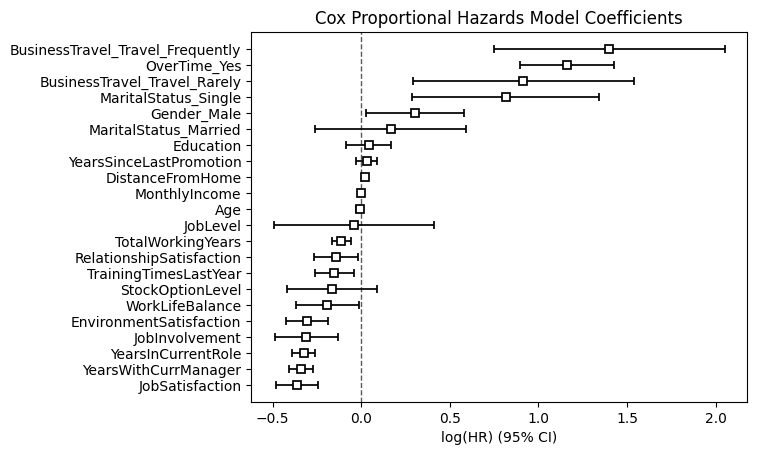

In [9]:
from lifelines import CoxPHFitter

# Select relevant columns
cox_data = employee_data[['tenure', 'event', 'Age','MonthlyIncome','YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion','TotalWorkingYears','TrainingTimesLastYear', 'JobSatisfaction', 'RelationshipSatisfaction','EnvironmentSatisfaction','OverTime','WorkLifeBalance','StockOptionLevel','BusinessTravel','MaritalStatus','DistanceFromHome','Gender','JobInvolvement','JobLevel','Education']]

# Encode categorical variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Initialize the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(cox_data, duration_col='tenure', event_col='event')

# Print the summary
cph.print_summary()

# Plot the coefficients
cph.plot()
plt.title('Cox Proportional Hazards Model Coefficients')
plt.show()

In [10]:
excluded = ['YearsAtCompany','Attrition']

# Select relevant columns
cox_data = employee_data.drop(columns=excluded)

# Encode categorical variables
cox_data = pd.get_dummies(cox_data, drop_first=True)

# Initialize the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the model
cph.fit(cox_data, duration_col='tenure', event_col='event')

# Print the summary
cph.print_summary()

# Plot the coefficients
# plt.figure(figsize=(10,10))
# cph.plot()
# plt.title('Cox Proportional Hazards Model Coefficients')
# plt.show()

c:\Users\User\envs\jupyternb\lib\site-packages\lifelines\fitters\coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.687. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or complete separation in the dataset?

  warnings.warn(


<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1155.51
         time fit was run = 2024-08-01 06:21:47 UTC

---
                                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                          
Age                               -0.02      0.98      0.01           -0.04            0.00                0.96                1.00
DailyRate                         -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
DistanceFromHome                   0.03      1.03      0.01            0.01            0.04                1.01                1.04
Education                          0.01      1.01      0.07           -0.12            0.14                0.88                1.15
EmployeeNumber                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
EnvironmentSatisfaction           -0.31      0.74      0.06           -0.43           -0.18                0.65                0.83
HourlyRate                         0.00      1.00      0.00           -0.00            0.01                1.00                1.01
JobInvolvement                    -0.26      0.77      0.09           -0.43           -0.08                0.65                0.92
JobLevel                          -0.08      0.93      0.27           -0.60            0.45                0.55                1.57
JobSatisfaction                   -0.37      0.69      0.06           -0.49           -0.24                0.61                0.79
MonthlyIncome                     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
MonthlyRate                        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
NumCompaniesWorked                 0.25      1.29      0.03            0.19            0.31                1.21                1.36
PercentSalaryHike                  0.00      1.00      0.03           -0.06            0.06                0.95                1.07
PerformanceRating                 -0.03      0.97      0.31           -0.65            0.58                0.52                1.78
RelationshipSatisfaction          -0.21      0.81      0.07           -0.34           -0.08                0.71                0.92
StockOptionLevel                  -0.20      0.82      0.13           -0.45            0.05                0.64                1.05
TotalWorkingYears                 -0.15      0.86      0.03           -0.21           -0.09                0.81                0.91
TrainingTimesLastYear             -0.21      0.81      0.06           -0.33           -0.09                0.72                0.91
WorkLifeBalance                   -0.15      0.86      0.09           -0.34            0.03                0.71                1.03
YearsInCurrentRole                -0.34      0.71      0.04           -0.41           -0.27                0.66                0.76
YearsSinceLastPromotion            0.06      1.06      0.03           -0.01            0.12                0.99                1.13
YearsWithCurrManager              -0.34      0.71      0.04           -0.41           -0.27                0.67                0.77
BusinessTravel_Travel_Frequently   1.40      4.06      0.34            0.72            2.08                2.06                7.97
BusinessTravel_Travel_Rarely       0.86      2.36      0.33            0.22            1.50                1.24                4.48
Department_Research & Development 15.40  4.87e+06   1622.95        -3165.